Extracting Dataset using Kaggle API

In [55]:
# installing the Kaggle library
!pip install kaggle

In [2]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.0-cp310-cp310-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.68.1-cp310-cp310-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached h5py-3.12.1-cp310-cp310-win_amd64.whl.metadata (2.5 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached namex-

In [5]:
# # configuring the path of Kaggle.json file
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

import os
import shutil

# Set up the directory for Kaggle credentials
kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Copy the kaggle.json file to the directory
shutil.copy("kaggle.json", kaggle_dir)

# Set file permissions (Windows does not strictly use chmod, but this works for basic flags)
os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)

print("Kaggle configuration has been successfully set up.")


Kaggle configuration has been successfully set up.


Importing the Dog vs Cat Dataset from Kaggle

In [65]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [57]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [58]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'


with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [59]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [60]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [61]:
file_names = os.listdir('train/')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

Importing the Dependencies

In [37]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2


Displaying the images of dogs and cats

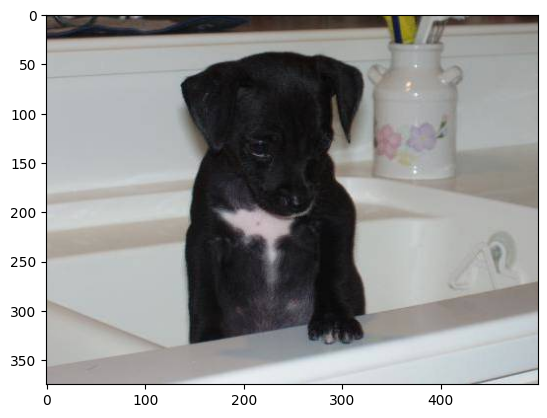

In [39]:
# display dog image
img = mpimg.imread('train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

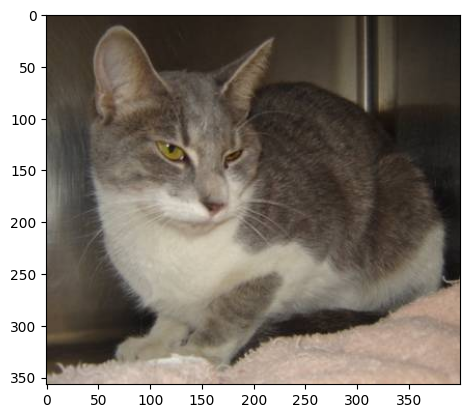

In [54]:
# display cat image
img = mpimg.imread('train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



In [41]:
file_names = os.listdir('train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [46]:
#creating a directory for resized images
os.mkdir('image resized')

In [66]:


original_folder = 'train/'
resized_folder = 'image_resized/'

# Ensure the resized folder exists
os.makedirs(resized_folder, exist_ok=True)

# Take images from 0 to 999 and 12500 to 13499
indices_to_process = list(range(1000)) + list(range(12500, 13500))

for i in indices_to_process:
    filename = os.listdir(original_folder)[i]
    img_path = os.path.join(original_folder, filename)

    # Open, resize, and save the image
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize to 224x224
    img = img.convert('RGB')  # Ensure 3 channels (RGB)

    new_img_path = os.path.join(resized_folder, filename)
    img.save(new_img_path)

print("Images processed and saved successfully!")


Images processed and saved successfully!


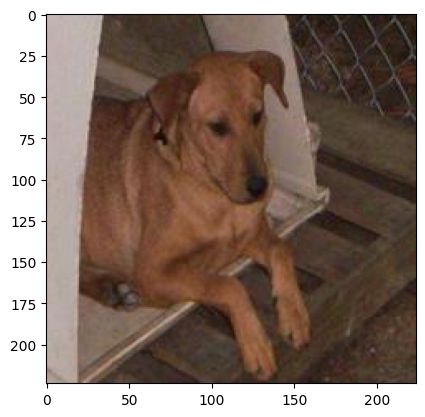

In [68]:
# display resized dog image
img = mpimg.imread('image_resized/dog.100.jpg')
imgplt = plt.imshow(img)
plt.show()

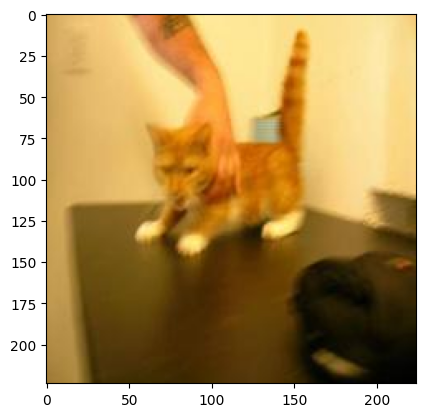

In [69]:
# display resized cat image
img = mpimg.imread('image_resized/cat.0.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [71]:
# creaing a for loop to assign labels
filenames = os.listdir('image_resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [72]:
print(filenames[0:5])
print(len(filenames))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
2000


In [73]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
2000


In [74]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


Converting all the resized images to numpy arrays

In [75]:
import cv2
import glob

In [82]:
image_directory = 'image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [83]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [122 200 246]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [123 201 247]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 204 245]
   [123 202 245]
   [123 202 245]]

  ...

  [[ 55 123 160]
   [ 55 123 160]
   [ 56 124 161]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 53 121 158]
   [ 54 122 159]
   [ 55 123 160]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 52 120 157]
   [ 52 120 157]
   [ 53 121 158]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [185 205 210]
   [173 197 203]
   [164 192 199]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [180 200 205]
   [169 195 201]
   [167 195 202]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [172 192 197]
   [167 193 200]
   [171 198

In [84]:
type(dog_cat_images)

numpy.ndarray

In [85]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [86]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [88]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [89]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [90]:
print(X_train_scaled)

[[[[0.43529412 0.4627451  0.49803922]
   [0.43137255 0.45882353 0.49411765]
   [0.4627451  0.48235294 0.51764706]
   ...
   [0.97647059 0.98431373 0.98431373]
   [0.98823529 0.99215686 0.98431373]
   [0.98823529 0.99215686 0.97647059]]

  [[0.22745098 0.25490196 0.29019608]
   [0.22352941 0.25098039 0.28627451]
   [0.25490196 0.2745098  0.30980392]
   ...
   [0.98039216 0.98823529 0.98823529]
   [0.99215686 0.99607843 0.98823529]
   [0.99215686 0.99607843 0.98039216]]

  [[0.21568627 0.23529412 0.27058824]
   [0.21176471 0.23137255 0.26666667]
   [0.24705882 0.25490196 0.29411765]
   ...
   [0.98431373 0.99215686 0.99215686]
   [0.99607843 1.         0.99215686]
   [1.         1.         0.98823529]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [1.         0.99607843 1.        ]
   [1.         0.99607843 1.        ]]

  [[0.99215686 0.99215686 0.99215686]
   [0.9

**Building the Neural Network**

In [91]:
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

In [92]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [93]:
num_of_classes = 2

model = tf_keras.Sequential([

    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [94]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [95]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5



50/50 [==============================] - 19s 283ms/step - loss: 0.1495 - acc: 0.9513
Epoch 2/5
50/50 [==============================] - 14s 283ms/step - loss: 0.0691 - acc: 0.9756
Epoch 3/5
50/50 [==============================] - 14s 285ms/step - loss: 0.0490 - acc: 0.9844
Epoch 4/5
50/50 [==============================] - 14s 279ms/step - loss: 0.0375 - acc: 0.9912
Epoch 5/5
50/50 [==============================] - 13s 268ms/step - loss: 0.0309 - acc: 0.9944


In [96]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 4s 255ms/step - loss: 0.0771 - acc: 0.9800
Test Loss = 0.07707490026950836
Test Accuracy = 0.9800000190734863


**Predictive System**

In [98]:


# Input image path
input_image_path = input('Path of the image to be predicted: ')

# Read the image
input_image = cv2.imread(input_image_path)

# Convert BGR to RGB for correct color display (OpenCV uses BGR format)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(input_image_rgb)
plt.axis('off')  # Hide axes for better view
plt.title("Input Image")
plt.show()

# Resize the image to 224x224
input_image_resize = cv2.resize(input_image, (224, 224))

# Scale the image values to [0, 1]
input_image_scaled = input_image_resize / 255.0

# Reshape the image to match the model's input shape
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Make a prediction
input_prediction = model.predict(image_reshaped)

print("Prediction Output:", input_prediction)

# Get the class with the highest probability
input_pred_label = np.argmax(input_prediction)

# Interpret the prediction
if input_pred_label == 0:
    print('The image represents a Cat')
else:
    print('The image represents a Dog')


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


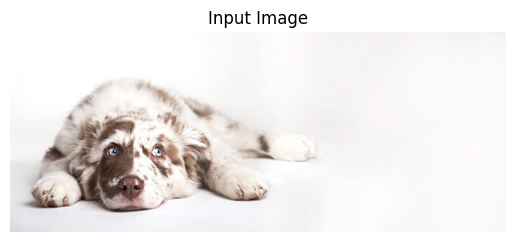

1/1 [==============================] - 0s 272ms/step
Prediction Output: [[-3.0952764  3.3401587]]
The image represents a Dog


In [101]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image

# Load the trained model (Make sure the model is available in the current directory or provide full path)
model = tf.keras.models.load_model('model.h5')

def predict_image(image_path):
    """
    Predicts if the image contains a Dog or a Cat.
    
    Args:
    - image_path (str): Path to the image file to classify.
    
    Returns:
    - str: 'Dog' or 'Cat' depending on the prediction.
    """
    # Read the image
    input_image = cv2.imread(image_path)

    # Convert BGR to RGB for correct color display (OpenCV uses BGR format)
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    # Resize the image to 224x224 for the model input
    input_image_resize = cv2.resize(input_image, (224, 224))

    # Scale the image values to [0, 1]
    input_image_scaled = input_image_resize / 255.0

    # Reshape the image to match the model's input shape
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

    # Make a prediction
    input_prediction = model.predict(image_reshaped)

    # Get the class with the highest probability
    input_pred_label = np.argmax(input_prediction)

    # Interpret the prediction
    if input_pred_label == 0:
        return 'Cat'
    else:
        return 'Dog'


In [102]:
# Save the trained model in HDF5 format
model.save('model.h5')



c:\Users\saip9\Downloads\ml-notes\Complete-Python-Bootcamp\ml-project\dogcatenv\lib\site-packages\tf_keras\src\engine\training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
